In [28]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

import seaborn as sns

In [29]:
df = pd.read_csv('Survey_Python.csv')
color1=[(200/255, 100/255, 101/255), (252/255, 157/255, 154/255), (249/255, 205/255, 173/255), (200/255, 200/255, 169/255), (131/255, 175/255, 155/255)]
color2 = [(182/255, 194/255, 154/255), (138/255, 151/255, 123/255), (244/255, 208/255, 0/255), (229/255, 131/255, 8/255), (220/255, 87/255, 18/255)]
color3 = [(199/255, 237/255, 233/255), (175/255, 215/255, 237/255), (92/255, 167/255, 186/255), (100/255, 66/255, 150/255), (147/255, 224/255, 255/255)]

In [30]:
df.head()

,Respondents,Datetime,Shopping_Frequency,Monthly_Spending,Goal,Factors,Unplanned_Item_Intention,Willingness_Amazon,Lack_Amazon,Willingness_Prada,Lack_Prada,interactivity_importantance,screendesign_importantance,trust/like,necessaties,personalized_design_intention,reconmandended_purchasing_intention,personalized_loc,age,Gender
0,1,2022/12/23,Every Season,0 - 30,3,Prices and events;Product presentation (mainly...,3,2,I am fine with it,3,I am fine with it,3,3,3,3,3,3,Under each category's main page;When you filte...,26 - 35,Female
1,2,2022/12/23,Every Season,Above 300,5,Prices and events;Product presentation (mainly...,2,3,Don't want to read the text (too much info);No...,2,I am fine with it,4,5,5,4,5,3,My account page,26 - 35,Male
2,3,2022/12/23,Every Month,0 - 30,2,Prices and events;Product presentation (mainly...,4,2,Don't want to read the text (too much info);No...,5,I am fine with it,5,5,4,5,5,5,"My account page;When you filter or search, it ...",19 - 25,Female
3,4,2022/12/23,Only at sales,0 - 30,2,Prices and events;Product presentation (mainly...,1,4,I am fine with it,3,I am fine with it,2,3,2,3,2,1,"When you filter or search, it will be shown in...",19 - 25,Male
4,5,2022/12/23,Every Year,0 - 30,3,Website Functionality Guidelines;Prices and ev...,2,4,I am fine with it,4,I am fine with it,5,5,5,5,4,3,Homepage,Under 18,Female


In [31]:
def make_autopct(values):
    # Adapt from BrechtDeMan and unutbu's solution
    # https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

    '''  
    Make autopct function to include 2 values, for later use of drawing pie chart
    
    Parameters
    -------
    values: list
        values sliced from the dataset

    Returns
    -------
    one percentage value and one numerical value for the graph
    '''
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

### Monthly Spending

In [32]:
df['Monthly_Spending'].value_counts()

80 - 150     55
30 - 80      49
0 - 30       36
150 - 300    28
Above 300    12
Name: Monthly_Spending, dtype: int64

In [33]:
import plotly.graph_objects as go
counts = df['Monthly_Spending'].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])

fig.update_layout(title_text='Monthly Spending', 
                  title_x=0.5, 
                  title_y=0.85,
                  font=dict(size=14),
                  legend=dict(x=0.68, y=0.5))
fig.show()

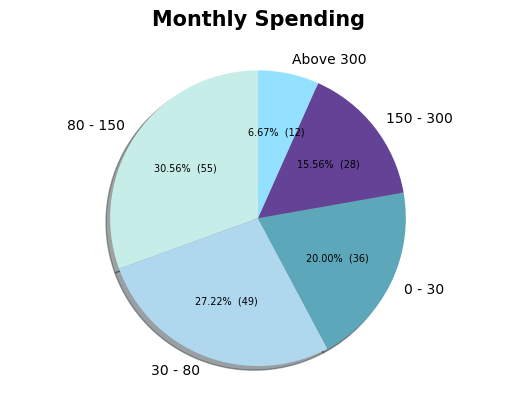

In [34]:
counts = df['Monthly_Spending'].value_counts()

plt.axis('equal')
plt.title('Monthly Spending', size = 15, weight ="bold")

# Create a custom legend with the counts

cts, texts, autotexts = plt.pie(counts, labels=counts.index, shadow = True, 
    autopct = make_autopct(counts), startangle=90,
    colors = color3)
plt.setp(autotexts, size = 7)
plt.show()

In [35]:
ms30_80 = df[df['Monthly_Spending'] == '30 - 80']
ms0_30 = df[df['Monthly_Spending'] == '0 - 30']
ms80_150 = df[df['Monthly_Spending'] == '80 - 150']
ms150_300 = df[df['Monthly_Spending'] == '150 - 300']
ms_ab_300 = df[df['Monthly_Spending'] == 'Above 300']
low_spending = pd.concat([ms30_80, ms0_30, ms80_150])
high_spending = pd.concat([ms150_300, ms_ab_300])

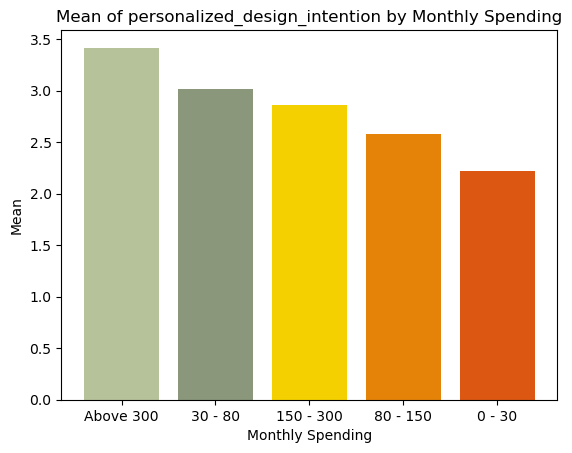

In [36]:
# Calculate the means of the 'personalized_design_intention' column for each group
ms30_80_mean = ms30_80['personalized_design_intention'].mean()
ms0_30_mean = ms0_30['personalized_design_intention'].mean()
ms80_150_mean = ms80_150['personalized_design_intention'].mean()
ms150_300_mean = ms150_300['personalized_design_intention'].mean()
ms_ab_300_mean = ms_ab_300['personalized_design_intention'].mean()

# Create a dictionary with the data
data = {'30 - 80': ms30_80_mean, '0 - 30': ms0_30_mean, '80 - 150': ms80_150_mean, 
        '150 - 300': ms150_300_mean, 'Above 300': ms_ab_300_mean}

# Sort the data in descending order
sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

# Set the labels and data for the bar chart
labels = list(sorted_data.keys())
data = list(sorted_data.values())

# Create the bar chart
plt.bar(labels, data, color = color2)

# Add a title and axis labels
plt.title('Mean of personalized_design_intention by Monthly Spending')
plt.xlabel('Monthly Spending')
plt.ylabel('Mean')

# Show the plot
plt.show()

In [37]:
import plotly.graph_objects as go
# Calculate the means of the columns for the low_spending group
low_spending_means = low_spending[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Calculate the means of the columns for the high_spending group
high_spending_means = high_spending[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Set the labels and data for the first bar chart
labels = ['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']
data1 = list(low_spending_means)
data2 = list(high_spending_means)

# Create trace1 for low_spending
trace1 = go.Bar(
x=labels,
y=data1,
name='low_spending'
)

# Create trace2 for high_spending
trace2 = go.Bar(
x=labels,
y=data2,
name='high_spending'
)

data = [trace1, trace2]

layout = go.Layout(
title='Means of columns by Monthly Spending',
xaxis=dict(title='Column'),
yaxis=dict(title='Mean'),
barmode='group'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

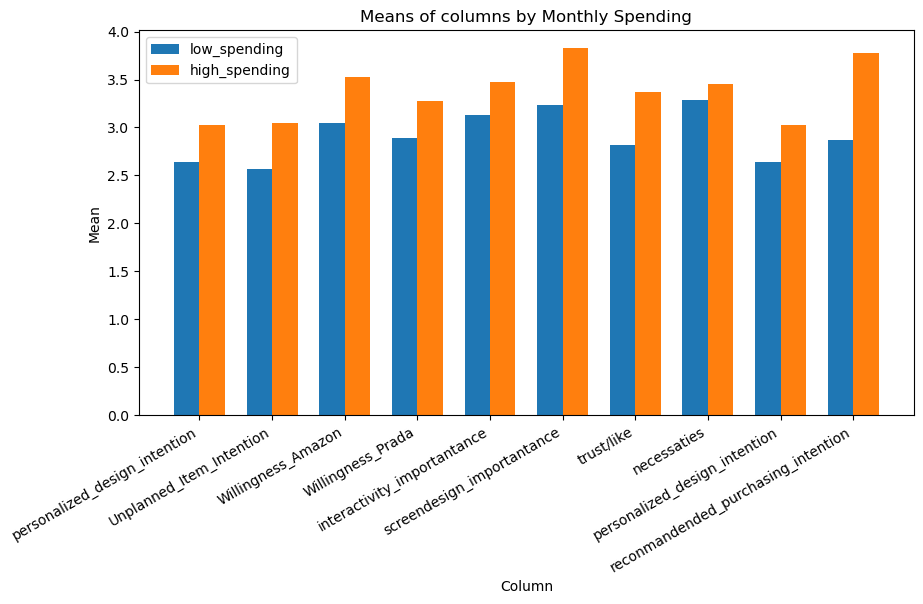

In [38]:
# Calculate the means of the columns for the low_spending group
low_spending_means = low_spending[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Calculate the means of the columns for the high_spending group
high_spending_means = high_spending[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Set the labels and data for the first bar chart
labels = ['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']
data1 = list(low_spending_means)
data2 = list(high_spending_means)

# Set the x-coordinates for the bar chart
x = np.arange(len(labels))

# Set the width of the bars
width = 0.35
plt.figure(figsize=(10, 5))

# Create the first bar chart
plt.bar(x - width/2, data1, width, label='low_spending')
plt.bar(x + width/2, data2, width, label='high_spending')

# Rotate the x tick labels by 45 degrees
plt.xticks(x, labels, rotation=30, ha='right')

# Add a legend
plt.legend()

# Add a title and axis labels
plt.title('Means of columns by Monthly Spending')
plt.xlabel('Column')
plt.ylabel('Mean')

# Show the plot
plt.show()

In [39]:
filtered_1 = low_spending[(df['Gender'] == 'Female') & (df['age'] == '19 - 25')]
filtered_1.head()

C:\Users\annab\AppData\Local\Temp\ipykernel_33548\462440831.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Respondents,Datetime,Shopping_Frequency,Monthly_Spending,Goal,Factors,Unplanned_Item_Intention,Willingness_Amazon,Lack_Amazon,Willingness_Prada,Lack_Prada,interactivity_importantance,screendesign_importantance,trust/like,necessaties,personalized_design_intention,reconmandended_purchasing_intention,personalized_loc,age,Gender
5,6,2022/12/23,Every Week,30 - 80,1,Prices and events;Product presentation (mainly...,3,2,Don't want to read the text (too much info);No...,5,I am fine with it,5,5,5,5,5,5,Under each category's main page;When you filte...,19 - 25,Female
9,10,2022/12/23,Every Month,30 - 80,4,Website Functionality Guidelines;Prices and ev...,3,4,No direct visual stimulation (e.g. images),4,I am fine with it,3,2,3,4,3,3,Homepage,19 - 25,Female
15,16,2022/12/24,Every Month,30 - 80,2,Prices and events,3,3,Font design,3,Poor font design,3,3,3,3,4,3,Under each category's main page,19 - 25,Female
16,17,2022/12/24,Every Month,30 - 80,1,Prices and events;Variety of payment options;S...,2,2,Don't want to read the text (too much info);Po...,4,I am fine with it,3,5,4,4,2,2,My account page,19 - 25,Female
28,29,2022/12/25,Every Season,30 - 80,5,Prices and events;After-sales service (return ...,4,2,Don't want to read the text (too much info);No...,4,I am fine with it,5,5,4,4,3,3,Homepage;Product information page;Your saved I...,19 - 25,Female


### Shopping Frequency

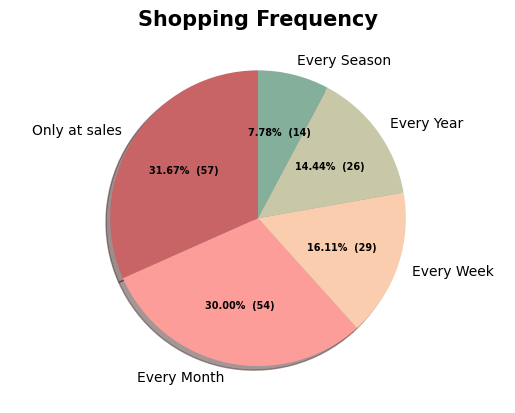

In [40]:
counts = df['Shopping_Frequency'].value_counts()

plt.axis('equal')
plt.title('Shopping Frequency', size = 15, weight ="bold")

# Create a custom legend with the counts

cts, texts, autotexts = plt.pie(counts, labels=counts.index, shadow = True, 
    autopct = make_autopct(counts), startangle=90,
    colors = color1)
plt.setp(autotexts, size = 7, weight ="bold")
plt.show()

In [41]:
sf_week = df[df['Shopping_Frequency'] == 'Every Week']
sf_month = df[df['Shopping_Frequency'] == 'Every Month']
sf_season = df[df['Shopping_Frequency'] == 'Every Season']
sf_sales = df[df['Shopping_Frequency'] == 'Only at sales']
sf_year = df[df['Shopping_Frequency'] == 'Every Year']
high_feq = pd.concat([sf_week, sf_month])
low_feq = pd.concat([sf_sales, sf_year, sf_season])

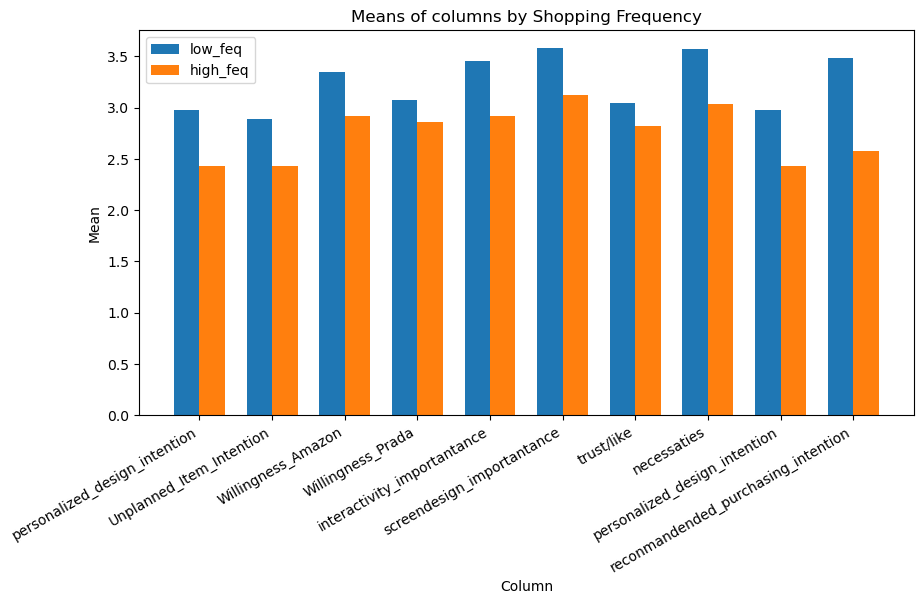

In [42]:
# Calculate the means of the columns for the low_spending group
low_feq_means = low_feq[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Calculate the means of the columns for the high_spending group
high_feq_means = high_feq[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Set the labels and data for the first bar chart
labels = ['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']
data1 = list(low_feq_means)
data2 = list(high_feq_means)

# Set the x-coordinates for the bar chart
x = np.arange(len(labels))

# Set the width of the bars
width = 0.35
plt.figure(figsize=(10, 5))

# Create the first bar chart
plt.bar(x - width/2, data1, width, label='low_feq')
plt.bar(x + width/2, data2, width, label='high_feq')

# Rotate the x tick labels by 45 degrees
plt.xticks(x, labels, rotation=30, ha='right')

# Add a legend
plt.legend()

# Add a title and axis labels
plt.title('Means of columns by Shopping Frequency')
plt.xlabel('Column')
plt.ylabel('Mean')

# Show the plot
plt.show()

### Gender

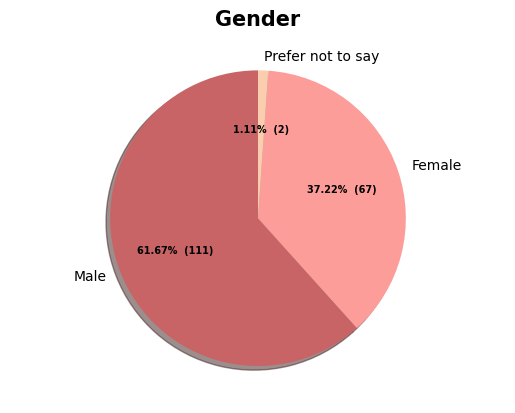

In [43]:
counts = df['Gender'].value_counts()

plt.axis('equal')
plt.title('Gender', fontname='AbadiMTStd', size = 15, weight ="bold")

# Create a custom legend with the counts

cts, texts, autotexts = plt.pie(counts, labels=counts.index, shadow = True, 
    autopct = make_autopct(counts), startangle=90,
    colors = color1)
plt.setp(autotexts, size = 7, weight ="bold")

plt.show()

In [44]:
counts = df['Gender'].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])

fig.update_layout(title_text='Gender', 
                  title_x=0.5, 
                  title_y=0.85,
                  font=dict(size=14),
                  legend=dict(x=0.71, y=0.5))
fig.show()

In [45]:
female = df[df['Gender'] == 'Female']
male = df[df['Gender'] == 'Male']

In [46]:
#calculate percentage
female_count = female['interactivity_importantance'].value_counts().sort_index()
male_count = male['interactivity_importantance'].value_counts().sort_index()
total_count = df['interactivity_importantance'].value_counts().sort_index()
female_percentage = (female_count/female_count.sum())*100
male_percentage = (male_count/male_count.sum())*100

fig = go.Figure(data=[
    go.Bar(name='Female', x=female_percentage.index, y=female_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(female_percentage.values, 2)], 
           textposition='auto', marker=dict(color='pink')),
    go.Bar(name='Male', x=male_percentage.index, y=male_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(male_percentage.values, 2)], 
           textposition='auto', marker=dict(color='blue'))
])

fig.update_layout(title = "Gender Distribution for Interactivity Importantance(UX)", xaxis_title="interactivity importantance", yaxis_title = "Percentage")
fig.show()

In [47]:
#calculate percentage
female_count = female['screendesign_importantance'].value_counts().sort_index()
male_count = male['screendesign_importantance'].value_counts().sort_index()
total_count = df['screendesign_importantance'].value_counts().sort_index()
female_percentage = (female_count/female_count.sum())*100
male_percentage = (male_count/male_count.sum())*100

fig = go.Figure(data=[
    go.Bar(name='Female', x=female_percentage.index, y=female_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(female_percentage.values, 2)], 
           textposition='auto', marker=dict(color='pink')),
    go.Bar(name='Male', x=male_percentage.index, y=male_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(male_percentage.values, 2)], 
           textposition='auto', marker=dict(color='blue'))
])

fig.update_layout(title = "Gender Distribution for Screendesign Importantance(UI)", xaxis_title="Screendesign Importantance", yaxis_title = "Percentage")
fig.show()

In [48]:
#calculate percentage
female_count = female['necessaties'].value_counts().sort_index()
male_count = male['necessaties'].value_counts().sort_index()
total_count = df['necessaties'].value_counts().sort_index()
female_percentage = (female_count/female_count.sum())*100
male_percentage = (male_count/male_count.sum())*100

fig = go.Figure(data=[
    go.Bar(name='Female', x=female_percentage.index, y=female_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(female_percentage.values, 2)], 
           textposition='auto', marker=dict(color='pink')),
    go.Bar(name='Male', x=male_percentage.index, y=male_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(male_percentage.values, 2)], 
           textposition='auto', marker=dict(color='blue'))
])

fig.update_layout(title = "Gender Distribution for Screendesign Importantance", xaxis_title="Screendesign Importantance", yaxis_title = "Percentage")
fig.show()

In [49]:
#calculate percentage
female_count = female['Willingness_Amazon'].value_counts().sort_index()
male_count = male['Willingness_Amazon'].value_counts().sort_index()
total_count = df['Willingness_Amazon'].value_counts().sort_index()
female_percentage = (female_count/female_count.sum())*100
male_percentage = (male_count/male_count.sum())*100

fig = go.Figure(data=[
    go.Bar(name='Female', x=female_percentage.index, y=female_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(female_percentage.values, 2)], 
           textposition='auto', marker=dict(color='pink')),
    go.Bar(name='Male', x=male_percentage.index, y=male_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(male_percentage.values, 2)], 
           textposition='auto', marker=dict(color='blue'))
])

fig.update_layout(title = "Gender Distribution for willingness to shop at Amazon", xaxis_title="Level", yaxis_title = "Percentage")
fig.show()

In [50]:
#calculate percentage
female_count = female['Willingness_Prada'].value_counts().sort_index()
male_count = male['Willingness_Prada'].value_counts().sort_index()
total_count = df['Willingness_Prada'].value_counts().sort_index()
female_percentage = (female_count/female_count.sum())*100
male_percentage = (male_count/male_count.sum())*100

fig = go.Figure(data=[
    go.Bar(name='Female', x=female_percentage.index, y=female_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(female_percentage.values, 2)], 
           textposition='auto', marker=dict(color='pink')),
    go.Bar(name='Male', x=male_percentage.index, y=male_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(male_percentage.values, 2)], 
           textposition='auto', marker=dict(color='blue'))
])

fig.update_layout(title = "Gender Distribution for willingness to shop at Prada", xaxis_title="Level", yaxis_title = "Percentage")
fig.show()

In [51]:
#calculate percentage
female_count = female['Goal'].value_counts().sort_index()
male_count = male['Goal'].value_counts().sort_index()
total_count = df['Goal'].value_counts().sort_index()
female_percentage = (female_count/female_count.sum())*100
male_percentage = (male_count/male_count.sum())*100

fig = go.Figure(data=[
    go.Bar(name='Female', x=female_percentage.index, y=female_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(female_percentage.values, 2)], 
           textposition='auto', marker=dict(color='pink')),
    go.Bar(name='Male', x=male_percentage.index, y=male_percentage.values, 
           text=["{:.2f}%".format(val) for val in np.round(male_percentage.values, 2)], 
           textposition='auto', marker=dict(color='blue'))
])

fig.update_layout(title = "Gender Distribution for 'Do you have a clear goal when browse fashion shopping pages?'", xaxis_title="Level", yaxis_title = "Percentage")
fig.show()

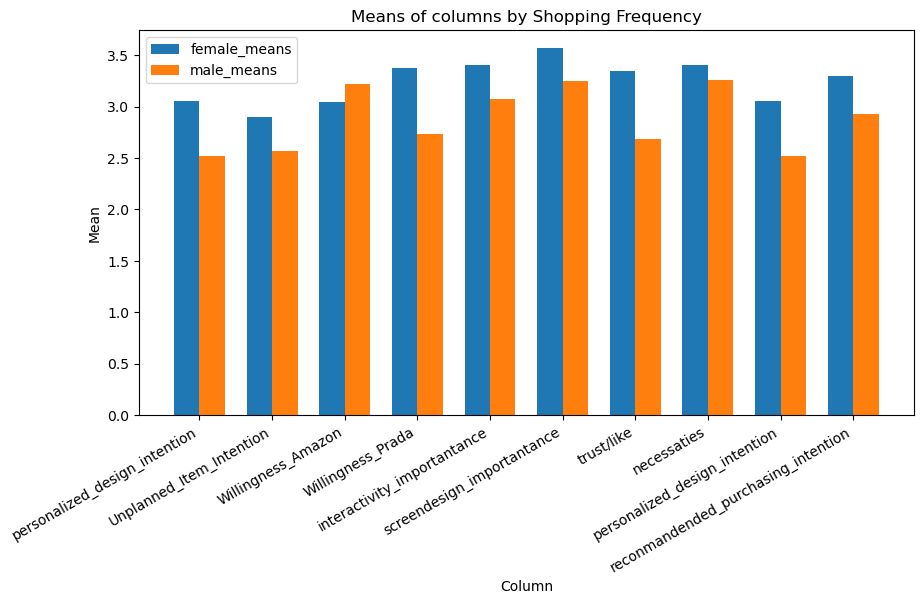

In [52]:
# Calculate the means of the columns for the low_spending group
female_means = female[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Calculate the means of the columns for the high_spending group
male_means = male[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Set the labels and data for the first bar chart
labels = ['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']
data1 = list(female_means)
data2 = list(male_means)

# Set the x-coordinates for the bar chart
x = np.arange(len(labels))

# Set the width of the bars
width = 0.35
plt.figure(figsize=(10, 5))

# Create the first bar chart
plt.bar(x - width/2, data1, width, label='female_means')
plt.bar(x + width/2, data2, width, label='male_means')

# Rotate the x tick labels by 45 degrees
plt.xticks(x, labels, rotation=30, ha='right')

# Add a legend
plt.legend()

# Add a title and axis labels
plt.title('Means of columns by Shopping Frequency')
plt.xlabel('Column')
plt.ylabel('Mean')

# Show the plot
plt.show()

### Age

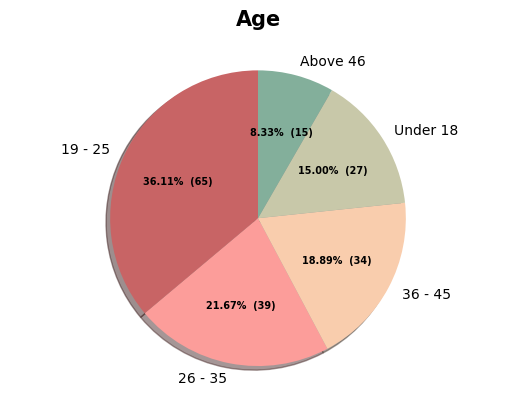

In [53]:
counts = df['age'].value_counts()

plt.axis('equal')
plt.title('Age', size = 15, weight ="bold")

# Create a custom legend with the counts

cts, texts, autotexts = plt.pie(counts, labels=counts.index, shadow = True, 
    autopct = make_autopct(counts), startangle=90,
    colors = color1)
plt.setp(autotexts, size = 7, weight ="bold")
plt.show()

In [54]:
counts = df['age'].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])

fig.update_layout(title_text='Age', 
                  title_x=0.5, 
                  title_y=0.85,
                  font=dict(size=14),
                  legend=dict(x=0.65, y=0.5))
fig.show()

In [55]:
age_18 = df[df['age'] == 'Under 18']
age_1925 = df[df['age'] == '19 - 25']
age_2635 = df[df['age'] == '26 - 35']
age_3645 = df[df['age'] == '36 - 45']
age_ab46 = df[df['age'] == 'Above 45']
GenZ = pd.concat([age_18, age_1925])
GenY = pd.concat([age_2635])
BabyBoom = pd.concat([age_3645, age_ab46])

In [57]:
import plotly.express as px

# Calculate the means of the columns for the GenZ group
GenZ_means = GenZ[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 
    'screendesign_importantance', 'trust/like', 'necessaties', 'reconmandended_purchasing_intention']].mean()

# Calculate the means of the columns for the GenY group
GenY_means = GenY[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 
    'screendesign_importantance', 'trust/like', 'necessaties', 'reconmandended_purchasing_intention']].mean()

# Calculate the means of the columns for the BabyBoom group
BabyBoom_means = BabyBoom[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 
    'screendesign_importantance', 'trust/like', 'necessaties', 'reconmandended_purchasing_intention']].mean()

# Set the labels and data for the first bar chart
labels = ['Personalized Design Intention', 'Unplanned Item', 'Willingness to Shop on Amazon', 'Willingness to Shop on Prada', 'Interactivity Importance', 'Screen Design Importance', 'Trust/Like', 'Necessities', 'Recommended Purchasing']

df = pd.DataFrame({'labels': labels, 'GenZ': list(GenZ_means), 'GenY': list(GenY_means), 'BabyBoom': list(BabyBoom_means)})

fig = px.bar(df, x='labels', y=['GenZ', 'GenY', 'BabyBoom'], barmode='group')

# Add a title
fig.update_layout(title='Means of Columns by Age Group', xaxis_title='Column', yaxis_title='Mean')

fig.show()

### Goals

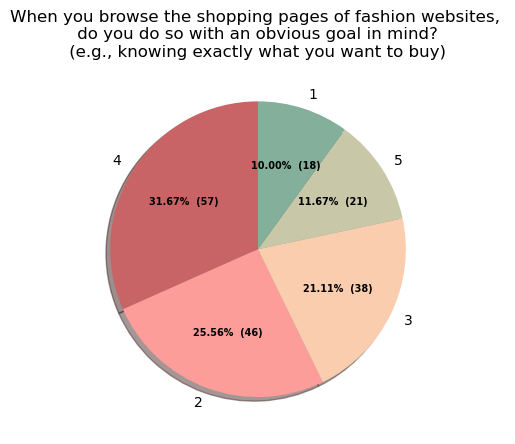

In [ ]:
counts = df['Goal'].value_counts()

plt.axis('equal')
plt.title('When you browse the shopping pages of fashion websites, \n do you do so with an obvious goal in mind? \n (e.g., knowing exactly what you want to buy) ')

# Create a custom legend with the counts

cts, texts, autotexts = plt.pie(counts, labels=counts.index, shadow = True, 
    autopct = make_autopct(counts), startangle=90,
    colors = color1)
plt.setp(autotexts, size = 7, weight ="bold")
plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=df['Goal'].value_counts(normalize=True).index,
                            y=df['Goal'].value_counts(normalize=True))])

fig.update_layout(title='Bar Chart', xaxis_title='Goals', yaxis_title='Counts')
fig.show()

<AxesSubplot:>

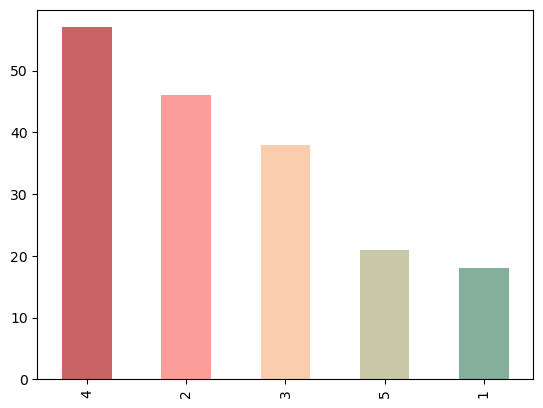

In [ ]:
df['Goal'].value_counts(normalize=False).plot(kind="bar", color = color1)

In [ ]:
Goal = df[df['Goal'] >= 4]
NG = df[df['Goal'] <= 2]
Mid_Goal = df[df['Goal'] == 3]

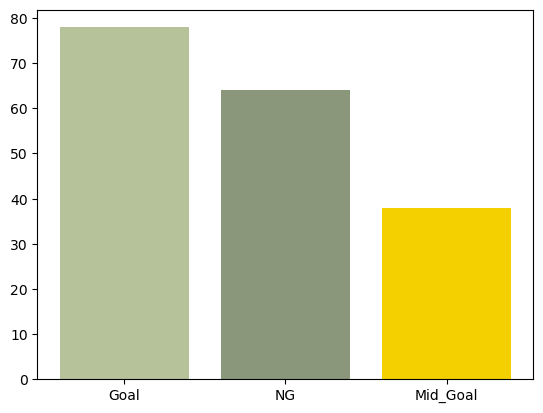

In [ ]:
# Get the counts of values in each group
goal_count = Goal['Goal'].count()
ng_count = NG['Goal'].count()
mid_goal_count = Mid_Goal['Goal'].count()

# Set the labels and data for the bar chart
labels = ['Goal', 'NG', 'Mid_Goal']
data = [goal_count, ng_count, mid_goal_count]

# Create the bar chart
plt.bar(labels, data, color = color2)

# Show the plot
plt.show()

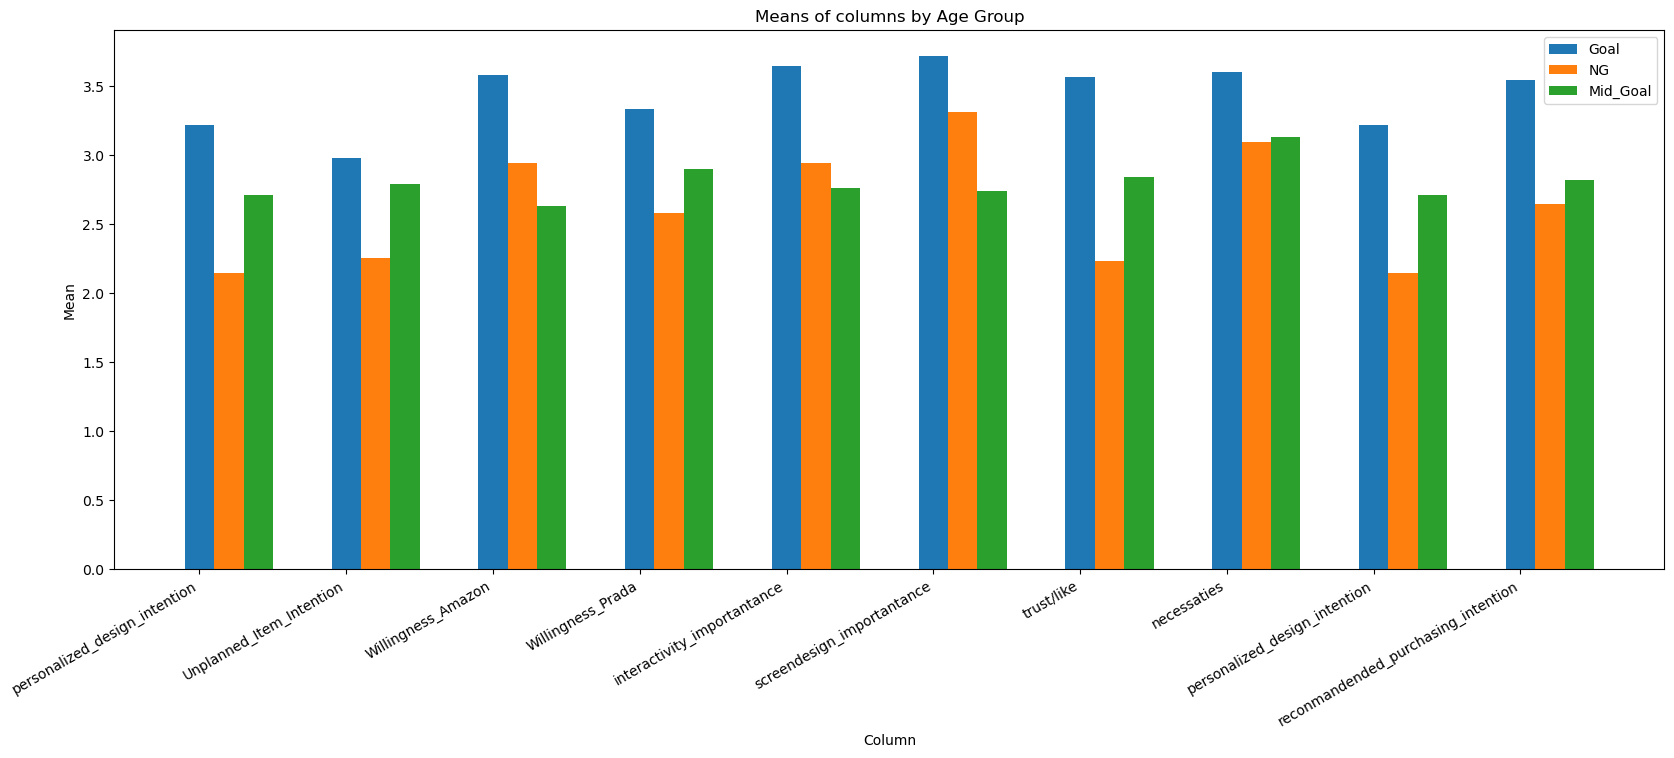

In [ ]:
# Calculate the means of the columns for the GenZ group
Goal_means = Goal[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Calculate the means of the columns for the GenY group
NG_means = NG[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Calculate the means of the columns for the BabyBoom group
Mid_Goal_means = Mid_Goal[['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']].mean()

# Set the labels and data for the first bar chart
labels = ['personalized_design_intention', 'Unplanned_Item_Intention', 'Willingness_Amazon', 'Willingness_Prada', 'interactivity_importantance', 'screendesign_importantance', 'trust/like', 'necessaties', 'personalized_design_intention', 'reconmandended_purchasing_intention']

# Set the data for the bar chart
data = [list(Goal_means), list(NG_means), list(Mid_Goal_means)]

# Set the x-coordinates for the bar chart
x = np.arange(len(labels))

# Set the width of the bars
width = 0.2

# Create the figure and subplot
fig, ax = plt.subplots(figsize=(20, 7))

# Create the bar chart
for i, d in enumerate(data):
    ax.bar(x + width*i, d, width, label=['Goal', 'NG', 'Mid_Goal'][i])

# Rotate the x tick labels by 45 degrees
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right')

# Add a legend
ax.legend()

# Add a title and axis labels
ax.set_title('Means of columns by Age Group')
ax.set_xlabel('Column')
ax.set_ylabel('Mean')

# Show the plot
plt.show()

### Interaction System VS Aesthetics

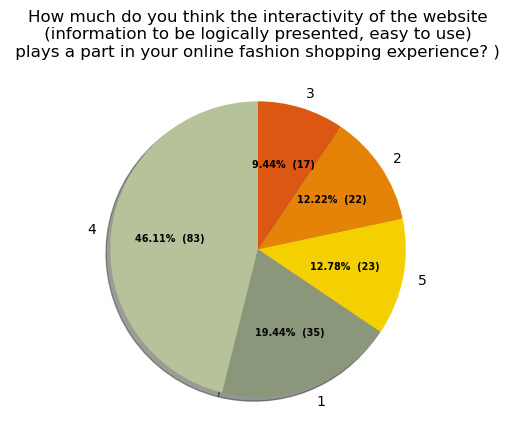

In [ ]:
counts = df['interactivity_importantance'].value_counts()

plt.axis('equal')
plt.title('How much do you think the interactivity of the website\n (information to be logically presented, easy to use) \n plays a part in your online fashion shopping experience? ) ')

# Create a custom legend with the counts

cts, texts, autotexts = plt.pie(counts, labels=counts.index, shadow = True, 
    autopct = make_autopct(counts), startangle=90,
    colors = color2)
plt.setp(autotexts, size = 7, weight ="bold")
plt.show()

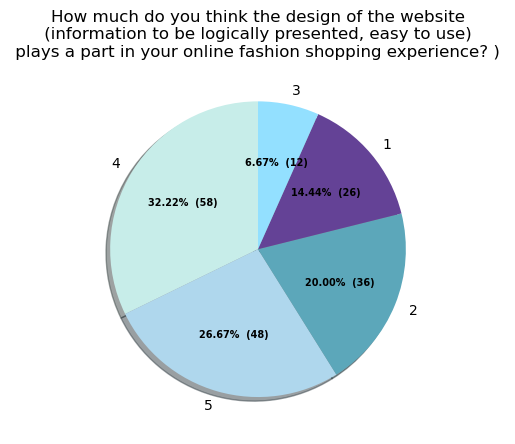

In [ ]:
counts = df['screendesign_importantance'].value_counts()

plt.axis('equal')
plt.title('How much do you think the design of the website\n (information to be logically presented, easy to use) \n plays a part in your online fashion shopping experience? ) ')

# Create a custom legend with the counts

cts, texts, autotexts = plt.pie(counts, labels=counts.index, shadow = True, 
    autopct = make_autopct(counts), startangle=90,
    colors = color3)
plt.setp(autotexts, size = 7, weight ="bold")
plt.show()

In [ ]:
SD_H = df[df['screendesign_importantance'] >= 4]
SD_L = df[df['screendesign_importantance'] <= 2]
Mid_SD = df[df['screendesign_importantance'] == 3]